<a href="https://colab.research.google.com/github/Daivageralda/A2-2_Source-Code/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentasi Pelanggan Menggunakan Metode Unsupervised Learning pada Data Penjualan Tiket Bioskop**

## Business Understanding


####Tujuan Bisnis
Tujuan bisnis dari proyek ini adalah untuk membantu manajemen bioskop dalam meningkatkan pendapatan dengan memahami perilaku konsumen saat membeli tiket. Dengan mengetahui faktor-faktor apa saja yang mempengaruhi keputusan pembelian tiket, manajemen dapat mengoptimalkan strategi pemasaran dan meningkatkan penjualan tiket.


####Situasi Bisnis
Manajemen bioskop mengalami penurunan penjualan tiket selama beberapa bulan terakhir, sehingga mereka ingin mengetahui faktor-faktor yang mempengaruhi keputusan pembelian tiket agar dapat meningkatkan pendapatan mereka.


####Tujuan Data Mining
Tujuan dari data mining pada proyek ini adalah untuk melakukan segmentasi pelanggan berdasarkan perilaku pembelian tiket mereka. Dalam hal ini, algoritma unsupervised learning akan digunakan untuk mengelompokkan pelanggan berdasarkan karakteristik pembelian tiket mereka, seperti jam tayang, harga tiket, kategori film, dan lokasi bioskop. Setelah melakukan segmentasi, manajemen dapat mengetahui karakteristik setiap kelompok pelanggan dan mengoptimalkan strategi pemasaran untuk meningkatkan penjualan tiket.


####Rencana Proyek

Rencana proyek untuk proyek ini meliputi tahapan sebagai berikut:
   - Business Understanding: Memahami tujuan bisnis dan situasi bisnis.
   - Data Understanding: Memahami struktur dan karakteristik dataset yang digunakan.
   - Data Preparation: Membersihkan, merapikan, dan mempersiapkan dataset untuk digunakan pada proses data mining.
   - Modelling: Menerapkan algoritma unsupervised learning pada dataset dan melakukan segmentasi pelanggan.
   - Evaluation: Mengevaluasi hasil segmentasi dan mengidentifikasi karakteristik setiap kelompok pelanggan.
   - Deployment: Mengoptimalkan strategi pemasaran untuk meningkatkan penjualan tiket berdasarkan hasil segmentasi dan karakteristik pelanggan.


##Data Understanding

####Collect Initial Data
Dataset yang digunakan pada proyek ini adalah dataset "Cinema Ticket" yang diunduh dari situs Kaggle.

Link Dataset : https://www.kaggle.com/datasets/arashnic/cinema-ticket

Kemudian dataset ini diekspor ke Github agar lebih mudah digunakan.

Link Github Dataset : https://raw.githubusercontent.com/pa-datamining/dataset/main/Cinema%20Ticket.csv



####Describe Data
Dilakukan perhitungan statistika deskriptif (mean, median, modus, standar deviasi) untuk setiap kolom tertentu yang memiliki nilai numerik

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/pa-datamining/dataset/main/Cinema%20Ticket.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


Penjelasan Kolom: 

1. film_code: kolom ini berisi kode unik untuk film yang diputar pada suatu waktu tertentu. Tipe datanya adalah int64 dengan Non-Null Count sebanyak 142,524.

2. cinema_code: kolom ini berisi kode unik untuk bioskop tempat film diputar. Tipe datanya adalah int64 dengan Non-Null Count sebanyak 142,524.

3. total_sales: kolom ini berisi total penjualan tiket untuk suatu film di bioskop tertentu pada hari tertentu. Tipe datanya adalah int64 dengan Non-Null Count sebanyak 142,524.

4. tickets_sold: kolom ini berisi jumlah tiket yang terjual untuk suatu film di bioskop tertentu pada hari tertentu. Tipe datanya adalah int64 dengan Non-Null Count sebanyak 142,524.

5. tickets_out: kolom ini berisi jumlah tiket yang telah terjual namun belum digunakan pada suatu film di bioskop tertentu pada hari tertentu. Tipe datanya adalah int64 dengan Non-Null Count sebanyak 142,524.

6. show_time: kolom ini berisi waktu tayang atau jam tayang film tersebut pada setiap hari penayangan. Tipe datanya adalah int64 dengan Non-Null Count sebanyak 142,524.

7. occu_perc: kolom ini berisi persentase kapasitas ruangan yang terisi saat pemutaran film. Tipe datanya adalah float64 dengan Non-Null Count sebanyak 142,399.

8. ticket_price: kolom ini berisi harga tiket untuk suatu film di bioskop tertentu pada hari tertentu. Tipe datanya adalah float64 dengan Non-Null Count sebanyak 142,524.

9. ticket_use: kolom ini berisi jumlah tiket yang digunakan pada suatu film di bioskop tertentu pada hari tertentu. Tipe datanya adalah int64 dengan Non-Null Count sebanyak 142,524.

10. capacity: kolom ini berisi kapasitas ruangan di bioskop tempat film diputar. Tipe datanya adalah float64 dengan Non-Null Count sebanyak 142,399.

11. date: kolom ini berisi tanggal pemutaran film. Tipe datanya adalah object dengan Non-Null Count sebanyak 142,524.

12. month: kolom ini berisi bulan pemutaran film. Tipe datanya adalah int64 dengan Non-Null Count sebanyak 142,524.

13. quarter: kolom ini berisi kuartal pemutaran film. Tipe datanya adalah int64 dengan Non-Null Count sebanyak 142,524.

14. day: kolom ini berisi hari pemutaran film. Tipe datanya adalah int64 dengan Non-Null Count sebanyak 142,524.


In [ ]:
df[['total_sales','tickets_sold','tickets_out','occu_perc','ticket_price','ticket_use','capacity']].describe()

total_sales   tickets_sold    tickets_out      occu_perc  \
count  1.425240e+05  142524.000000  142524.000000  142399.000000   
mean   1.234728e+07     140.137570       0.237413      19.965986   
std    3.065486e+07     279.758733       2.923206      22.653445   
min    2.000000e+04       1.000000       0.000000       0.000000   
25%    1.260000e+06      18.000000       0.000000       3.750000   
50%    3.720000e+06      50.000000       0.000000      10.350000   
75%    1.110000e+07     143.000000       0.000000      28.210000   
max    1.262820e+09    8499.000000     311.000000     147.500000   

        ticket_price     ticket_use       capacity  
count  142524.000000  142524.000000  142399.000000  
mean    81234.599886     139.900157     854.723605  
std     33236.599278     279.564935     953.118103  
min       483.870968    -219.000000      -2.000000  
25%     60000.000000      18.000000     276.994486  
50%     79454.235185      50.000000     525.714286  
75%    100000.000000     143.000000    1038.961039  
max    700000.000000    8499.000000    9692.097160

Berdasarkan hasil di atas dapat diketahui jumlah, rata - rata, standar deviasi, nilai minimum maksimum pada beberapa kolom numerik yang telah ditentukan sebelumnya

In [ ]:
df.sample(5)

film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
12767        1494          489      4000000            31            0   
59019        1484           39     19750000           395            0   
133062       1493          266      5400000            36            0   
138295       1556          454       120000             2            0   
61315        1553          518     74040000           835            0   

        show_time  occu_perc   ticket_price  ticket_use     capacity  \
12767           6      11.07  129032.258065          31   280.036134   
59019           6      11.95   50000.000000         395  3305.439331   
133062          5       4.36  150000.000000          36   825.688073   
138295          1       0.67   60000.000000           2   298.507463   
61315          13      60.25   88670.658683         835  1385.892116   

              date  month  quarter  day  
12767   2018-07-18      7        3   18  
59019   2018-05-15      5        2   15  
133062  2018-07-28      7        3   28  
138295  2018-09-07      9        3    7  
61315   2018-10-19     10        4   19

Output di atas merupakan tampilan dataframe dalam bentuk tabel dan hanya 5 indeks saja yang ditampilkan, sebab menggunakan metode 'head()'

####Explore Data
Setiap kolom atau fitur akan divisualisasikan ke dalam plot, tidak terkecuali kolom yang bertipe numerik maupun kategorikal. Visualisasi akan dibagi menjadi dua tahap, yaitu Univariate dan Bivariate



In [ ]:
import seaborn as sns
import plotly.express as plt
import matplotlib.pyplot as plt

3 baris di atas merupakan library - library yang digunakan untuk visualisasi pada kolom dalam dataframe, ke depannya library ini juga akan digunakan untuk visualisasi pada **Data Preparation** dan **Evaluation**

#####Univariate
Visualisasi yang hanya akan melihat distribusi dari tiap - tiap kolom saja

In [ ]:
import plotly.subplots as sp
import plotly.graph_objs as go
import plotly.express as px

# Dictionary untuk nama bulan
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Menambahkan kolom baru "month_name" dengan nama bulan
df['month_name'] = df['month'].map(month_names)

# Membuat subplot pie chart untuk day dan month distribution
fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]], 
                       subplot_titles=['Day Distribution', 'Month Distribution'])

fig.add_trace(
    go.Pie(
        labels=df['day'].value_counts().index,
        values=df['day'].value_counts().values,
        hole=0.5,
        name='Day Distribution',
        marker=dict(colors=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=df['month'].value_counts().index,
        values=df['month'].value_counts().values,
        hole=0.5,
        name='Month Distribution',
        marker=dict(colors=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628'])
    ),
    row=1, col=2
)

# Menambahkan subplot pie chart untuk penjualan per hari
fig.add_trace(
    px.pie(df, values='total_sales', names='day', title='Penjualan Per Hari',
            labels={'day': 'Day', 'total_sales': 'Total Sales'}).data[0],
    row=1, col=1
)

# Menambahkan subplot pie chart untuk penjualan per bulan
fig.add_trace(
    px.pie(df, values='total_sales', names='month_name', title='Penjualan Per Bulan',
            labels={'month_name': 'Month', 'total_sales': 'Total Sales'}).data[0],
    row=1, col=2
)

# Menambahkan legend di sebelah masing-masing plot
fig.update_traces(
    showlegend=True,
    row=1, col=1
)

fig.update_traces(
    showlegend=True,
    row=1, col=2
)


# Menampilkan chart
fig.show()


**Pie plot** di atas menunjukkan distribusi total penjualan per hari dan per bulan. Dapat dilihat bahwa total penjualan tertinggi ada pada tanggal 24 dan 26 dengan persentase masing-masing sebesar 4,16%. Selain itu, total penjualan tertinggi ada pada bulan April dengan persentase sebesar 19,8%.

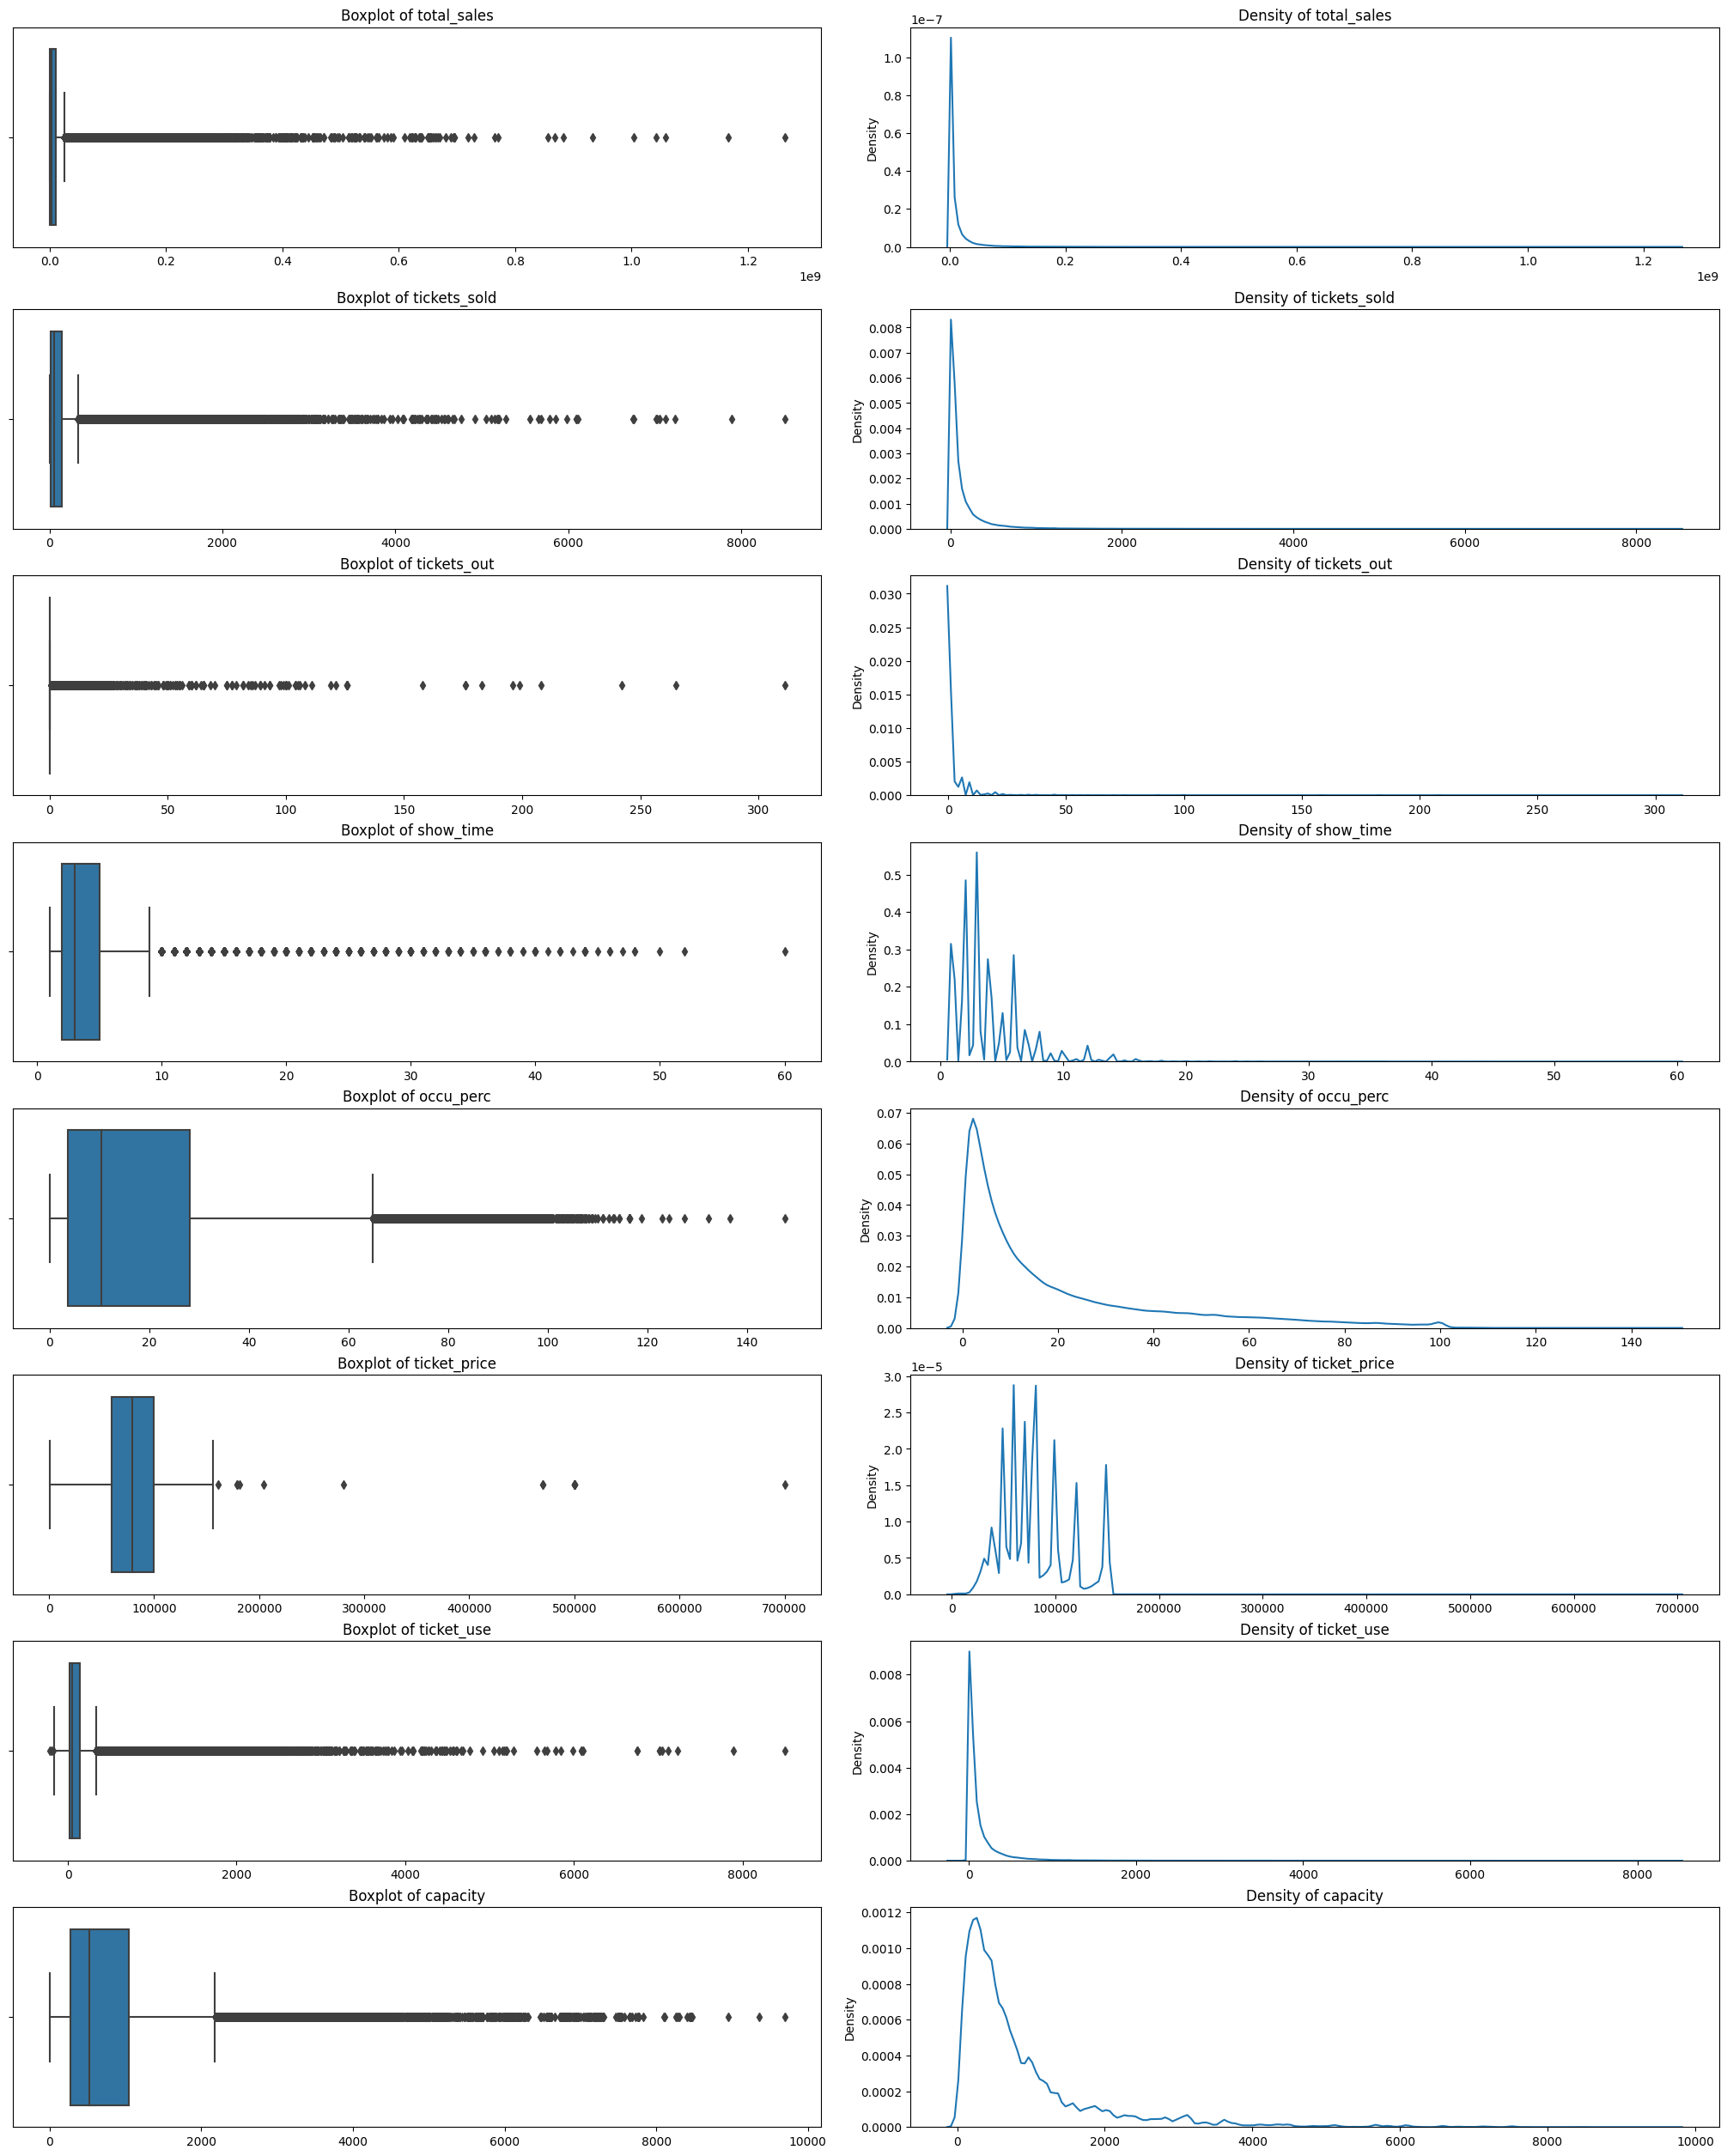

In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop(['film_code','cinema_code','day','month','quarter'], axis=1)

fig, axes = plt.subplots(8, 2, figsize=(20  , 25),constrained_layout = True)

for ax, col in zip(axes, df_numeric.columns):
    sns.boxplot(data=df, x=col, ax=ax[0])
    sns.kdeplot(df,x=col,ax=ax[1], bw_adjust=0.5)
    ax[0].set_xlabel('')
    ax[1].set_xlabel('')
    ax[0].set_title(f'Boxplot of {col}')
    ax[1].set_title(f'Density of {col}')
# plt.tight_layout()
plt.show()


Visualisasi di atas menampilkan **bar plot** dan **density plot** dari beberapa kolom yang telah dipilih. Dari grafik tersebut, dapat dilihat bahwa terdapat banyak sekali **outlier** pada data yang digunakan. Selain itu, hanya beberapa kolom saja, seperti **occu_perc**, **capacity**, **total_sales**, **tickets_out**, dan **ticket_use**, yang memiliki distribusi yang menyerupai kurva ***bell-shaped***, namun tetap memiliki banyak sekali **outlier** yang terdeteksi.

Text(0.5, 1.0, 'Distribusi Quarter Pada Dataset Cinema Ticket')

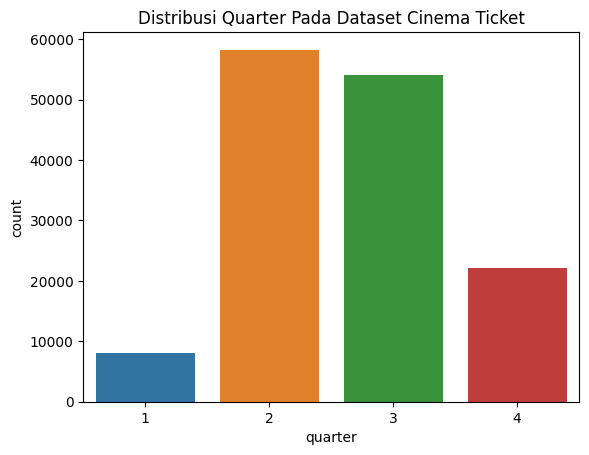

In [ ]:
plot = sns.countplot(x='quarter',data=df)
plot.set_title('Distribusi Quarter Pada Dataset Cinema Ticket')

Dari dataset tiket bioskop, dapat diketahui bahwa kuarter yang paling banyak muncul adalah kuarter 2 (April - Juni) dengan jumlah kemunculan hampir mencapai 60 ribu.

#####Bivariate
Visualisasi yang menampilkan distribusi antara dua variabel

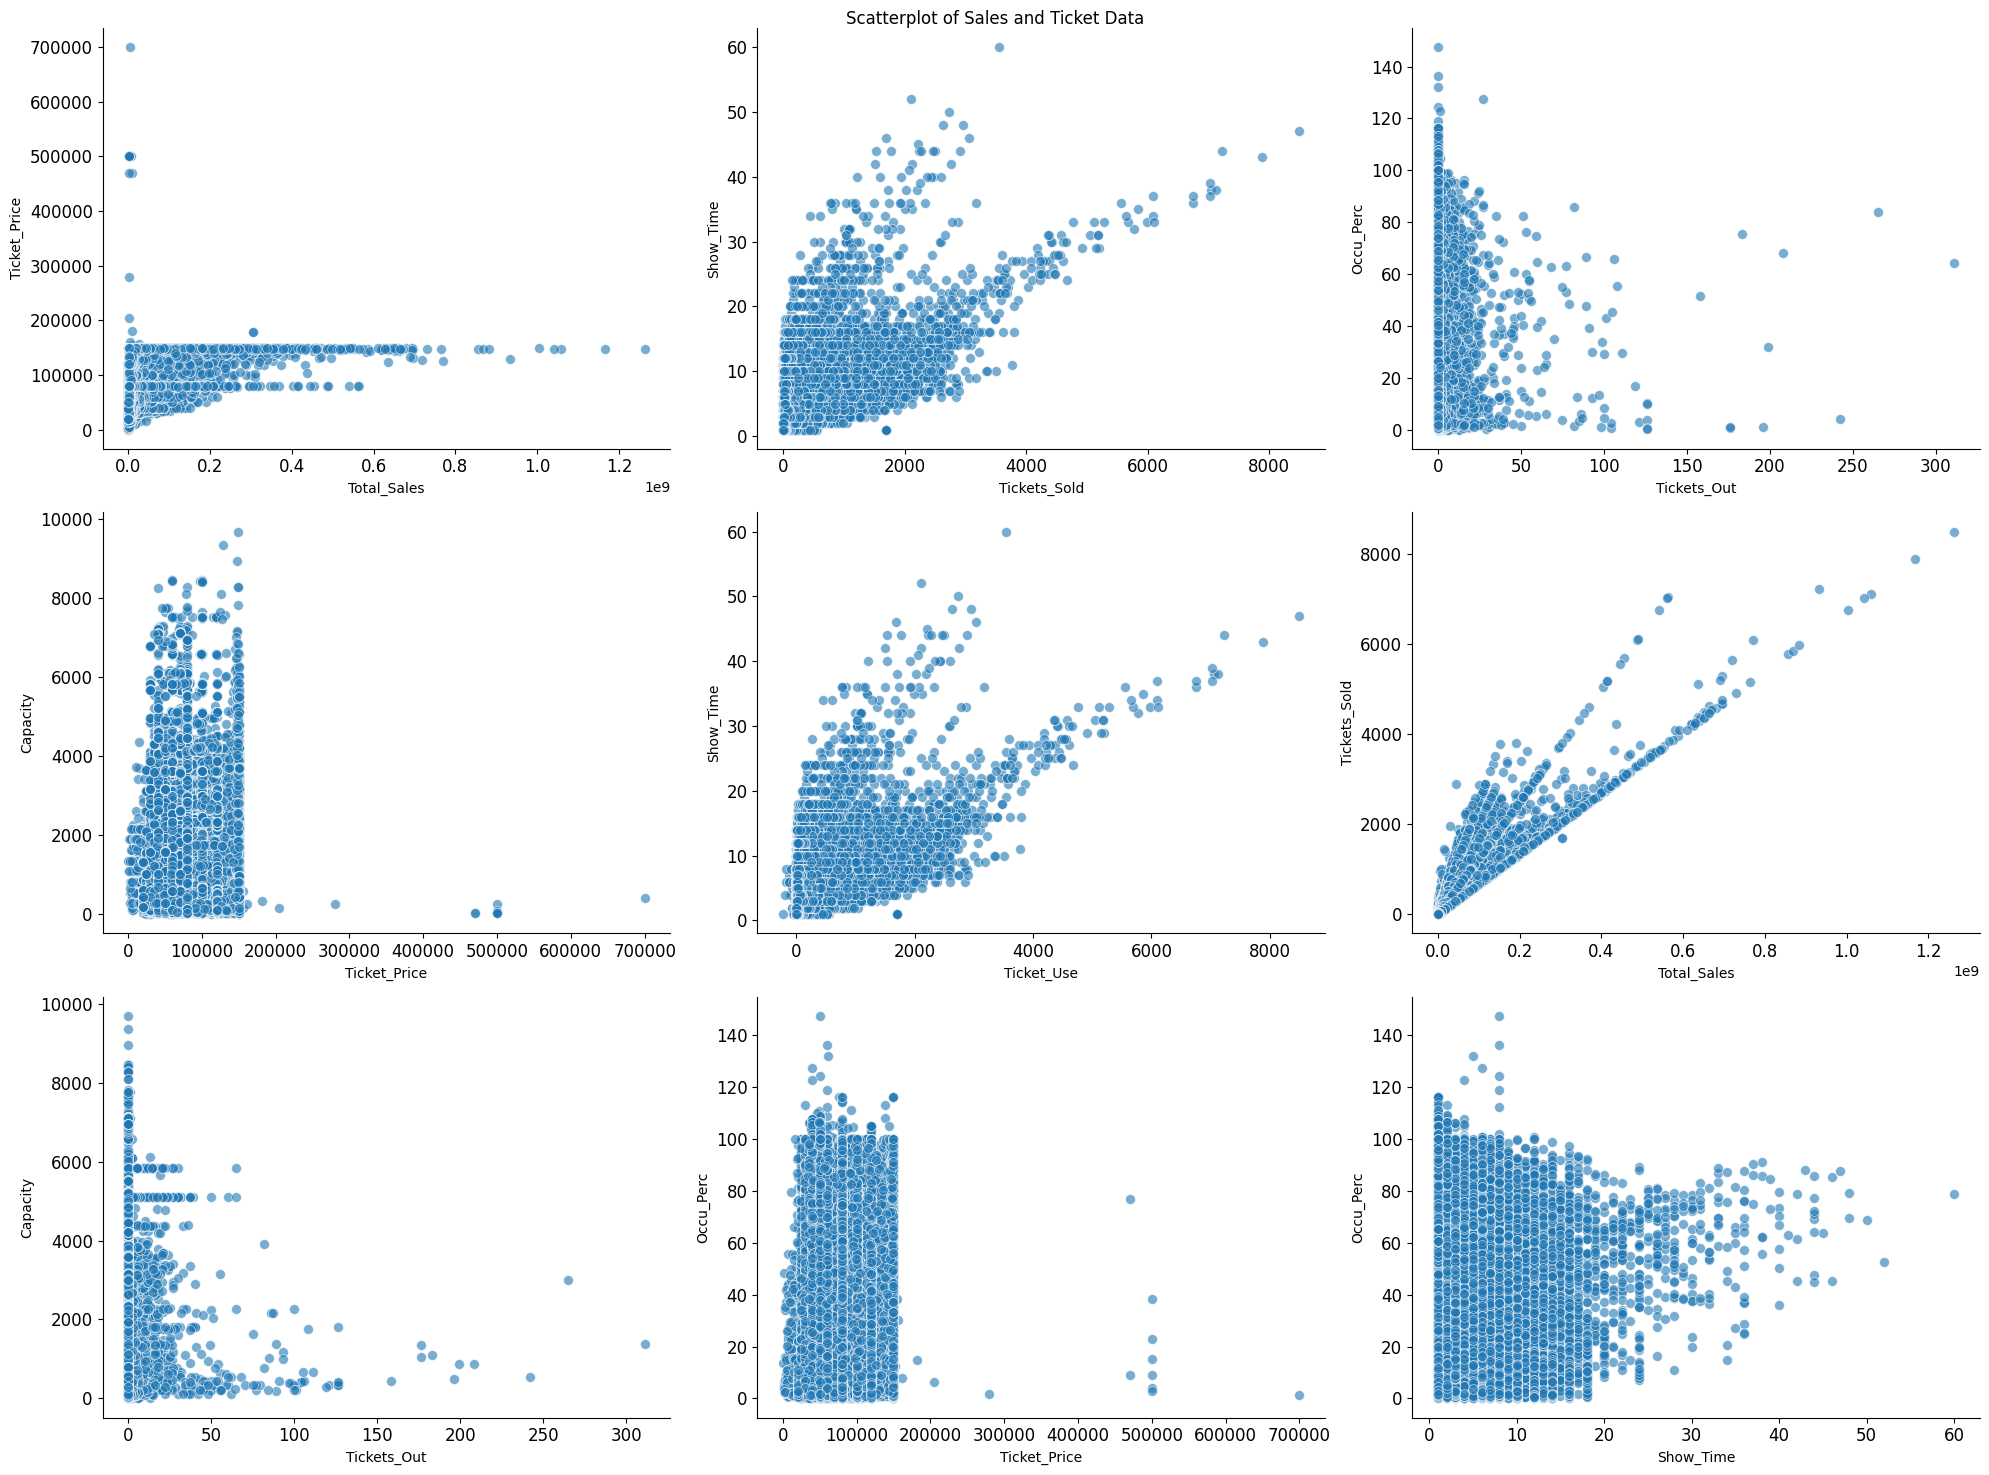

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define combinations of columns for scatterplots
combos = [['total_sales', 'ticket_price'], ['tickets_sold', 'show_time'], 
          ['tickets_out', 'occu_perc'], ['ticket_price', 'capacity'],
          ['ticket_use', 'show_time'], ['total_sales', 'tickets_sold'], 
          ['tickets_out', 'capacity'], ['ticket_price', 'occu_perc'], 
          ['show_time', 'occu_perc']]

# Create subplot figure with 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Set title for the whole subplot
fig.suptitle('Scatterplot of Sales and Ticket Data')

# Create scatterplots for each combination of columns
for i, combo in enumerate(combos):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=combo[0], y=combo[1], data=df, ax=axs[row][col], s=50, alpha=0.6)
    axs[row][col].set_xlabel(combo[0].title())
    axs[row][col].set_ylabel(combo[1].title())
    axs[row][col].tick_params(axis='both', labelsize=12)
    axs[row][col].spines['top'].set_visible(False)
    axs[row][col].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


Berdasarkan **scatter** plot di atas, terdapat beberapa hal yang dapat diperhatikan:

1. Terdapat kecenderungan bahwa total penjualan meningkat seiring dengan kenaikan harga tiket. Total penjualan terbanyak terjadi pada harga tiket sekitar 150 ribu.
2. Rata-rata tiket terjual pada film dengan jam tayang di bawah 20, dengan jumlah penjualan terbanyak mencapai hampir 4000 tiket.
3. Tingkat keterisian bioskop terkait dengan jumlah tiket yang tidak digunakan (tickets_out), sehingga jika jumlah tiket yang tidak digunakan sama dengan 0, maka tingkat keterisian bioskop dapat mencapai persentase maksimumnya.
4. Kapasitas bioskop cenderung hampir sama pada seluruh harga tiket, meskipun terdapat beberapa outlier.
5. Rata-rata tiket digunakan pada film dengan jam tayang di bawah 20, dengan jumlah penggunaan tiket terbanyak mencapai hampir 4000 tiket.
6. Jika total penjualan meningkat, maka jumlah tiket yang terjual akan semakin banyak.
7. Rata-rata jumlah tiket yang sudah terjual namun belum digunakan terjadi ketika kapasitas penonton yang diberikan oleh bioskop berada di bawah 5000 penonton.
8. Tingkat keterisian bioskop hampir sama untuk seluruh harga tiket, meskipun terdapat beberapa outlier.
9. Rata-rata tingkat keterisian bioskop terbanyak terjadi ketika jam tayang film yang diputar berada di bawah 20.

####Verifikasi Data
Dilakukan pengecekan kualitas data untuk memastikan bahwa data yang digunakan dalam proses pemodelan sudah teruji dan valid, sehingga menghasilkan pemodelan yang berkualitas.



In [ ]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
month_name        0
dtype: int64

Output di atas menyatakan bahwa kolom ***occu_perc*** dan ***capacity*** memiliki nilai kosong sebanyak 125 baris

In [ ]:
df[df.duplicated()]

film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
56269       1484          448    324719994          2170            0   
56270       1484          637    304000000          1700            0   
56271       1484          344    136500000           914            3   
56272       1484          304     98100000           661            0   
56273       1484          163     97080000           813            0   
...          ...          ...          ...           ...          ...   
56370       1484          315      2500000            50            0   
56371       1484          487      1600000            16            0   
56372       1484          472      1575000            25            0   
56373       1484          299      1100000            28            0   
56374       1484          286       960000            12            0   

       show_time  occu_perc   ticket_price  ticket_use     capacity  \
56269         13      83.49  149640.550230        2170  2599.113666   
56270          1        NaN  178823.529412        1700          NaN   
56271          6      57.20  149343.544858         911  1597.902098   
56272          5      87.20  148411.497731         661   758.027523   
56273          8      80.65  119409.594096         813  1008.059516   
...          ...        ...            ...         ...          ...   
56370          2      16.67   50000.000000          50   299.940012   
56371          5       1.31  100000.000000          16  1221.374046   
56372          1       8.68   63000.000000          25   288.018433   
56373          2       3.00   39285.714286          28   933.333333   
56374          2       2.40   80000.000000          12   500.000000   

             date  month  quarter  day month_name  
56269  2018-03-24      3        1   24      March  
56270  2018-03-24      3        1   24      March  
56271  2018-03-24      3        1   24      March  
56272  2018-03-24      3        1   24      March  
56273  2018-03-24      3        1   24      March  
...           ...    ...      ...  ...        ...  
56370  2018-03-24      3        1   24      March  
56371  2018-03-24      3        1   24      March  
56372  2018-03-24      3        1   24      March  
56373  2018-03-24      3        1   24      March  
56374  2018-03-24      3        1   24      March  

[106 rows x 15 columns]

Output di atas menyatakan bahwa dataframe tersebut memiliki baris yang terduplikat sebanyak 106 baris

In [ ]:
cols = ['total_sales', 'tickets_sold', 'tickets_out', 'occu_perc', 'ticket_price', 'ticket_use', 'capacity']

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom         Persentase Outliers
total_sales             11.250737
tickets_sold            10.532261
tickets_out              4.299627
occu_perc                6.763071
ticket_price             0.010525
ticket_use              10.517527
capacity                 8.456821

Tabel di atas menunjukkan persentase outliers pada kolom tertentu. Dalam kasus ini, data outliers akan dipertimbangkan karena terdapat persentasenya yang melebihi 10%, yang berarti jumlah data outliers-nya lumayan banyak.

In [ ]:
df_corr = df[['total_sales','tickets_sold','tickets_out','occu_perc','ticket_price','ticket_use','capacity']].corr(numeric_only=True)
px.imshow(df_corr)

Visualisasi di atas menunjukkan korelasi antara kolom tertentu dalam dataframe. Terlihat bahwa terdapat korelasi yang kuat antara kolom 'tickets_sold' dengan kolom 'total_sales' yang bernilai 0,999. Hal ini dapat diinterpretasikan bahwa semakin banyak tiket terjual, semakin tinggi total penjualannya. Dengan demikian, dapat disimpulkan bahwa terdapat keterkaitan yang erat antara jumlah tiket yang terjual dan total penjualan pada bioskop, sehingga semakin tinggi jumlah tiket yang terjual maka semakin tinggi juga total penjualannya.

##Data Preparation

####Select Data
Data yang dipilih adalah data yang bersumber dari kaggle dan sudah diekspor ke dalam github agar lebih mudah digunakan. Data ini berisikan 142,524 baris dan 14 kolom dengan 1 kolom tambahan yaitu 'month_name'. Namun, data yang akan digunakan adalah 5% dari total data yaitu sebanyak 7.126 baris dikarenakan apabila jumlah datanya banyak, maka akan memperlambat waktu eksekusi yang akan dilakukan pada analisis

In [ ]:
df_select = df.sample(frac=0.05, random_state=42)
df_select

film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
43174        1495          365       280000             4            0   
79022        1576          362      7735000           221            0   
100455       1485          485      6610000            45            0   
52932        1484          441      2200000            44            0   
96385        1572          417      6980000            64            0   
...           ...          ...          ...           ...          ...   
48184        1559          529      1440000            12            0   
113464       1481          476      2480000            62            0   
97626        1564           82       960000            12            0   
20546        1496          485      2400000            16            0   
26912        1499          556      4920000            41            0   

        show_time  occu_perc   ticket_price  ticket_use     capacity  \
43174           8       0.16   70000.000000           4  2500.000000   
79022           4      34.64   35000.000000         221   637.990762   
100455          1      97.83  146888.888889          45    45.998160   
52932           6       2.82   50000.000000          44  1560.283688   
96385           5       3.73  109062.500000          64  1715.817694   
...           ...        ...            ...         ...          ...   
48184           3       8.00  120000.000000          12   150.000000   
113464          4       2.85   40000.000000          62  2175.438596   
97626           6       1.26   80000.000000          12   952.380952   
20546           3      11.59  150000.000000          16   138.050043   
26912           3      19.52  120000.000000          41   210.040984   

              date  month  quarter  day month_name  
43174   2018-06-22      6        2   22       June  
79022   2018-10-02     10        4    2    October  
100455  2018-05-05      5        2    5        May  
52932   2018-04-22      4        2   22      April  
96385   2018-09-28      9        3   28  September  
...            ...    ...      ...  ...        ...  
48184   2018-09-15      9        3   15  September  
113464  2018-06-19      6        2   19       June  
97626   2018-09-02      9        3    2  September  
20546   2018-05-06      5        2    6        May  
26912   2018-07-13      7        3   13       July  

[7126 rows x 15 columns]

####Cleaning Data
Meliputi proses penghapusan data kosong, penghapusan outliers berdasarkan syarat tertentu, dan penghapusan data yang terduplikat agar proses analisis yang dilakukan dapat memberikan hasil yang optimal

In [ ]:
df_select.isna().sum()

film_code        0
cinema_code      0
total_sales      0
tickets_sold     0
tickets_out      0
show_time        0
occu_perc       14
ticket_price     0
ticket_use       0
capacity        14
date             0
month            0
quarter          0
day              0
month_name       0
dtype: int64

Output tersebut menunjukkan bahwa terdapat 14 baris kosong pada kolom **occu_perc** dan **capacity** yang setara dengan sekitar 0,088% dari total data sebanyak 7.127. Oleh karena itu, perlu dilakukan pengisian nilai kosong dengan menggunakan nilai rata-rata dari masing-masing kolom.

In [ ]:
df_select['occu_perc'].fillna(df_select['occu_perc'].mean(), inplace=True)
df_select['capacity'].fillna(df_select['capacity'].mean(), inplace=True)

In [ ]:
df_select.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
month_name      0
dtype: int64

Output di atas sudah menunjukkan bahwa setiap kolom pada dataframe tidak memiliki nilai yang kosong

In [ ]:
df_select[df_select.duplicated()]

Empty DataFrame
Columns: [film_code, cinema_code, total_sales, tickets_sold, tickets_out, show_time, occu_perc, ticket_price, ticket_use, capacity, date, month, quarter, day, month_name]
Index: []

Berdasarkan output di atas, dapat dilihat bahwa tidak ada baris duplikat di dalam dataframe yang digunakan.

In [ ]:
cols = ['total_sales', 'tickets_sold', 'occu_perc', 'ticket_price', 'ticket_use', 'capacity']

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df_select[col].quantile(0.25)
    q3 = df_select[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df_select[(df_select[col] < lower_bound) | (df_select[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df_select))*100
    if percent_outliers < 10:
      df_select = df_select[~((df_select[col] > upper_bound) | (df_select[col] < lower_bound))]
    outliers_after = df_select[(df_select[col] < lower_bound) | (df_select[col] > upper_bound)]
    percent_outliers_after = (len(outliers_after)/len(df_select))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers_after})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom         Persentase Outliers
total_sales             11.422958
tickets_sold            10.637104
occu_perc                0.000000
ticket_price             0.000000
ticket_use              10.359281
capacity                 0.000000

Tabel di atas menunjukkan daftar kolom beserta persentase outliers-nya. Kolom **occu_perc**, **ticket_price**, dan **capacity** memiliki persentase outlier sebesar 0% karena nilai outlier yang sebelumnya terdapat pada kedua kolom tersebut telah dihapus karena persentasenya di bawah 10%.

In [ ]:
df_select

film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
79022        1576          362      7735000           221            0   
52932        1484          441      2200000            44            0   
96385        1572          417      6980000            64            0   
113571       1481          454       650000            13            0   
89350        1554          426      1140000            19            0   
...           ...          ...          ...           ...          ...   
48184        1559          529      1440000            12            0   
113464       1481          476      2480000            62            0   
97626        1564           82       960000            12            0   
20546        1496          485      2400000            16            0   
26912        1499          556      4920000            41            0   

        show_time  occu_perc  ticket_price  ticket_use     capacity  \
79022           4      34.64       35000.0         221   637.990762   
52932           6       2.82       50000.0          44  1560.283688   
96385           5       3.73      109062.5          64  1715.817694   
113571          1       4.33       50000.0          13   300.230947   
89350           3       2.88       60000.0          19   659.722222   
...           ...        ...           ...         ...          ...   
48184           3       8.00      120000.0          12   150.000000   
113464          4       2.85       40000.0          62  2175.438596   
97626           6       1.26       80000.0          12   952.380952   
20546           3      11.59      150000.0          16   138.050043   
26912           3      19.52      120000.0          41   210.040984   

              date  month  quarter  day month_name  
79022   2018-10-02     10        4    2    October  
52932   2018-04-22      4        2   22      April  
96385   2018-09-28      9        3   28  September  
113571  2018-06-17      6        2   17       June  
89350   2018-08-20      8        3   20     August  
...            ...    ...      ...  ...        ...  
48184   2018-09-15      9        3   15  September  
113464  2018-06-19      6        2   19       June  
97626   2018-09-02      9        3    2  September  
20546   2018-05-06      5        2    6        May  
26912   2018-07-13      7        3   13       July  

[6101 rows x 15 columns]

####Transform Data
Dilakukan untuk mengubah data menjadi bentuk baru yang lebih mudah digunakan

In [ ]:
df_select['date'] = pd.to_datetime(df_select['date'])
df_select.sample(5)

film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
85204        1554          141      8850000            71            0   
11751        1494          381      1740000            30            0   
107839       1482          396      6500000            65            0   
123429       1578          253      4060000            58            0   
15815        1494          253       385000            11            0   

        show_time  occu_perc   ticket_price  ticket_use    capacity  \
85204           6       9.17  124647.887324          71  774.263904   
11751           2       8.82   58000.000000          30  340.136054   
107839          1      46.43  100000.000000          65  139.995692   
123429          4      15.26   70000.000000          58  380.078637   
15815           5       1.42   35000.000000          11  774.647887   

             date  month  quarter  day month_name  
85204  2018-10-01     10        4    1    October  
11751  2018-05-13      5        2   13        May  
107839 2018-05-11      5        2   11        May  
123429 2018-11-02     11        4    2   November  
15815  2018-06-09      6        2    9       June

####Reduction Data
Dilakukan untuk menghilangkan atau menghapus kolom yang tidak keberadaannya tidak terlalu berpengaruh dan memiliki kemungkinkan menghambat analisis yang akan dilakukan

In [ ]:
df_reduct = df_select.drop(['film_code','cinema_code','date', 'month_name'],axis=1)
df_reduct

total_sales  tickets_sold  tickets_out  show_time  occu_perc  \
79022       7735000           221            0          4      34.64   
52932       2200000            44            0          6       2.82   
96385       6980000            64            0          5       3.73   
113571       650000            13            0          1       4.33   
89350       1140000            19            0          3       2.88   
...             ...           ...          ...        ...        ...   
48184       1440000            12            0          3       8.00   
113464      2480000            62            0          4       2.85   
97626        960000            12            0          6       1.26   
20546       2400000            16            0          3      11.59   
26912       4920000            41            0          3      19.52   

        ticket_price  ticket_use     capacity  month  quarter  day  
79022        35000.0         221   637.990762     10        4    2  
52932        50000.0          44  1560.283688      4        2   22  
96385       109062.5          64  1715.817694      9        3   28  
113571       50000.0          13   300.230947      6        2   17  
89350        60000.0          19   659.722222      8        3   20  
...              ...         ...          ...    ...      ...  ...  
48184       120000.0          12   150.000000      9        3   15  
113464       40000.0          62  2175.438596      6        2   19  
97626        80000.0          12   952.380952      9        3    2  
20546       150000.0          16   138.050043      5        2    6  
26912       120000.0          41   210.040984      7        3   13  

[6101 rows x 11 columns]

####Slicing Data
Untuk mendapatkan data yang relevan dan menghemat waktu eksekusi, data akan diambil 1000 baris secara acak agar dapat terbagi dengan rata

In [ ]:
df_sliced = df_reduct.sample(n=1000, random_state=42)
df_sliced

total_sales  tickets_sold  tickets_out  show_time  occu_perc  \
115386      2960000           348            0          7      18.41   
80710       1000000            20            0          2       4.98   
95840       7000000            70            0          3       6.24   
140101     13650000            94            0          4      21.76   
110868      4590000           153            0          2      19.13   
...             ...           ...          ...        ...        ...   
2086        2100000            30            0          3       3.47   
58955       3865000           143            0          4      11.72   
23136        210000             3            0          2       0.94   
6606        2000000            25            0          1      12.82   
119131      3220000            46            0          2      10.02   

         ticket_price  ticket_use     capacity  month  quarter  day  
115386    8505.747126         348  1890.277023      5        2   22  
80710    50000.000000          20   401.606426      8        3   10  
95840   100000.000000          70  1121.794872     10        4    5  
140101  145212.765957          94   431.985294      8        3   23  
110868   30000.000000         153   799.790904      4        2   17  
...               ...         ...          ...    ...      ...  ...  
2086     70000.000000          30   864.553314      6        2   29  
58955    27027.972028         143  1220.136519      5        2   16  
23136    70000.000000           3   319.148936      7        3   19  
6606     80000.000000          25   195.007800      7        3    8  
119131   70000.000000          46   459.081836      4        2   21  

[1000 rows x 11 columns]

##Modelling

####Select Modelling Techniques
Pada penelitian ini, algoritma clustering yang akan digunakan adalah algoritma K-Means. Algoritma K-means adalah metode clustering unsupervised learning yang dapat digunakan untuk melakukan segmentasi pelanggan pada data penjualan tiket bioskop. Algoritma ini akan membagi data ke dalam k grup berdasarkan jarak Euclidean antara setiap data dan pusat kluster.

Pusat kluster awal dipilih secara acak dan dihitung ulang setelah setiap iterasi. Proses ini berulang hingga pusat kluster tidak berubah atau iterasi telah mencapai batas tertentu.

Jumlah kluster dapat ditentukan sebelumnya atau dengan menggunakan metode elbow untuk menemukan jumlah kluster yang optimal. Metode elbow akan menentukan titik di mana penambahan kluster tidak memberikan peningkatan yang signifikan pada variance dalam kluster.

Output dari algoritma K-means adalah kluster yang berisi data-data yang serupa di dalamnya. Hasil segmentasi ini dapat digunakan untuk meningkatkan strategi pemasaran dan kepuasan pelanggan pada bisnis penjualan tiket bioskop.





In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import time

Baris di atas merupakan library - library yang akan digunakan dalam proses Pre-Processing hingga Modelling menggunakan algoritma K-Means Clustering

####Pre-processing
Pada analisis ini akan dilakukan encoding dan penskalaan, encoding adalah proses transformasi nilai pada dataframe menjadi numerik semua dan penskalaan adalah mentransformasi data numerik sehingga skala nilainya menjadi sama atau seimbang. Pensklaan berguna untuk meningkatkan kinerja model dan memastikan bahwa variabel yang mempunyai skala yang lebih besar tidak mendominasi variabel lainnya dalam proses pembelajaran model.

#####Encoding

In [ ]:
train = pd.get_dummies(df_sliced)

######Scalling

In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(train)

####Modelling
Pada tahap ini, proses modelling akan di mulai dari menentukan nilai k yang mampu memberikan hasil clustering optimal pada data yang digunakan lalu melakuka clustering terhadap data sesuai dengan nilai k yang terbaik

#####Select Optimal K Value
Elbow method adalah salah satu metode yang digunakan untuk menentukan jumlah kluster (k) yang optimal pada algoritma K-means dalam analisis data segmentasi pelanggan pada penjualan tiket bioskop.

Metode elbow memplotkan jumlah kluster yang berbeda pada sumbu-x dengan nilai fungsi objektif (SSE) pada sumbu-y. SSE merupakan jumlah kuadrat jarak antara setiap titik data dan pusat kluster terdekat pada kluster yang sesuai.

Grafik hasil plot SSE vs k kemudian dilihat apakah terdapat titik pada grafik yang menyerupai siku-siku. Titik ini disebut dengan elbow point.

Elbow point menunjukkan nilai k optimal di mana penambahan kluster tidak memberikan peningkatan yang signifikan pada SSE. Nilai k yang optimal ini kemudian dapat digunakan pada algoritma K-means untuk melakukan segmentasi pelanggan pada data penjualan tiket bioskop.

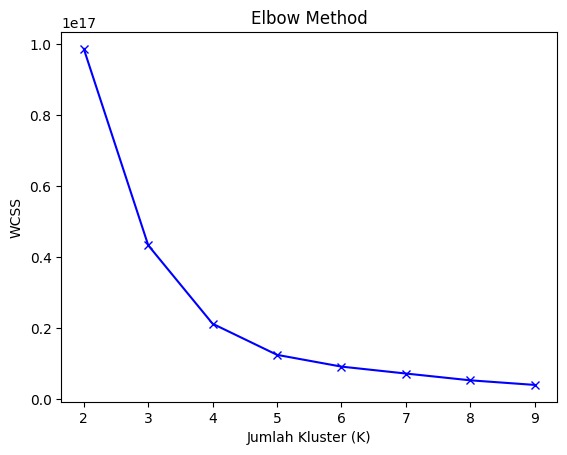

In [ ]:
import warnings
warnings.filterwarnings("ignore")
elbow_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train)
    elbow_scores.append(kmeans.inertia_)

plt.plot(k_range, elbow_scores,"bx-")
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Setelah melakukan analisis dengan menggunakan metode elbow pada grafik hasil plot SSE vs k, ditemukan bahwa nilai k yang optimal untuk analisis segmentasi pelanggan pada data penjualan tiket bioskop adalah 4. Hal ini dikarenakan pada grafik terlihat bahwa setelah angka 4, tidak terdapat penurunan yang signifikan pada distorsi yang semakin mengecil. Oleh karena itu, nilai k yang optimal untuk analisis ini adalah 4.

#####Calculating KMeans
Dalam pengembangan algoritma K-means untuk analisis segmentasi pelanggan pada data penjualan tiket bioskop, akan dibuat sebuah class yang bernama Kmeans. Class tersebut akan berisi fungsi-fungsi untuk menentukan kluster mana sebuah baris data akan ditempatkan dan untuk menentukan pusat kluster secara acak.

In [ ]:
class Kmeans:
    """The k-means algorithm."""

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        if 'species' in self.data.columns:
            self.data.drop('species', axis=1, inplace=True)

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            
            if self.verbose:
                time.sleep(3)

            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

In [ ]:
number_of_clusters = 4
kmeans = Kmeans(n_clusters=number_of_clusters)
kmeans.train(df=train, verbose=False)

Untuk menjalankan class Kmeans, perlu dilakukan inisiasi objek terlebih dahulu dengan menentukan jumlah kluster yang diinginkan (nilai kluster sudah ditentukan sebelumnya saat penggunaan elbow method). Setelah itu, dilakukan training pada data train untuk melatih model algoritma K-Means.

In [ ]:
# Extract the results
train['cluster'] = kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
all_df = pd.concat([train, centroids])

Bagian ini akan digunakan untuk mengekstrak hasil kluster yang telah dilakukan sebelumnya, lalu menyimpannya dalam sebuah variabel baru bernama **all_df**

#####2D Plotting & Explanation
Akan dilakukan plotting secara 2 dimensi untuk tiap variabel tertentu agar dapat menjelasakan ciri-ciri dari setiap kluster yang sudah dihitung

In [ ]:
def plot_cluster(cluster_df):
    cols = ['total_sales', 'tickets_sold', 'show_time','ticket_price', 'capacity', 'occu_perc', 'tickets_out']
    num_rows = len(cols) + 1  # tambahkan satu baris untuk countplot day dan quarter
    fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))
    
    # plot untuk setiap kolom numerik
    for i, col in enumerate(cols):
        row = i
        col_idx = 0
        sns.histplot(data=cluster_df, x=col, ax=ax[row][col_idx], kde=True)
        col_idx = 1
        sns.boxplot(data=cluster_df, x=col, ax=ax[row][col_idx])
    
    # plot untuk countplot day dan quarter
    row = num_rows - 1
    col_idx = 0
    sns.countplot(data=cluster_df, x='day', ax=ax[row][col_idx])
    ax[row][col_idx].set_xlabel('Tanggal')
    ax[row][col_idx].set_ylabel('Count')
    col_idx = 1
    sns.countplot(data=cluster_df, x='quarter', ax=ax[row][col_idx])
    ax[row][col_idx].set_xlabel('Quarter')
    ax[row][col_idx].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()


Fungsi di atas merupakan fungsi untuk menampilkan kluster

In [ ]:
cluster1 = train[train['cluster'] == 0]
cluster2 = train[train['cluster'] == 1]
cluster3 = train[train['cluster'] == 2]
cluster4 = train[train['cluster'] == 3]

Baris tersebut merupakan baris untuk menampung setiap baris data ke dalam kluster yang sesuai, dan baris hasil kluster tersebut akan disimpan dalam sebuah variabel.

In [ ]:
cluster1.describe()

total_sales  tickets_sold  tickets_out   show_time   occu_perc  \
count  7.840000e+02    784.000000   784.000000  784.000000  784.000000   
mean   2.618758e+06     38.590561     0.149235    3.003827   10.184105   
std    2.410444e+06     41.304643     1.258199    1.826787   11.864428   
min    6.000000e+04      1.000000     0.000000    1.000000    0.000000   
25%    7.700000e+05     12.000000     0.000000    2.000000    2.577500   
50%    1.707500e+06     25.500000     0.000000    3.000000    5.780000   
75%    3.777500e+06     50.000000     0.000000    4.000000   12.790000   
max    1.044000e+07    348.000000    22.000000   12.000000   62.350000   

        ticket_price  ticket_use     capacity       month     quarter  \
count     784.000000  784.000000   784.000000  784.000000  784.000000   
mean    74882.692428   38.441327   570.049255    6.863520    2.642857   
std     29709.712240   41.308565   440.964793    2.046832    0.776408   
min      7000.000000    1.000000    -2.000000    3.000000    1.000000   
25%     50000.000000   12.000000   255.422351    5.000000    2.000000   
50%     70000.000000   25.000000   441.005869    7.000000    3.000000   
75%     95766.843972   50.000000   748.034843    8.000000    3.000000   
max    150000.000000  348.000000  2216.981132   11.000000    4.000000   

              day  cluster  
count  784.000000    784.0  
mean    16.359694      0.0  
std      8.776388      0.0  
min      1.000000      0.0  
25%      9.000000      0.0  
50%     17.000000      0.0  
75%     24.000000      0.0  
max     31.000000      0.0

tabel di atas merupakan statistika deskriptif pada cluster 1

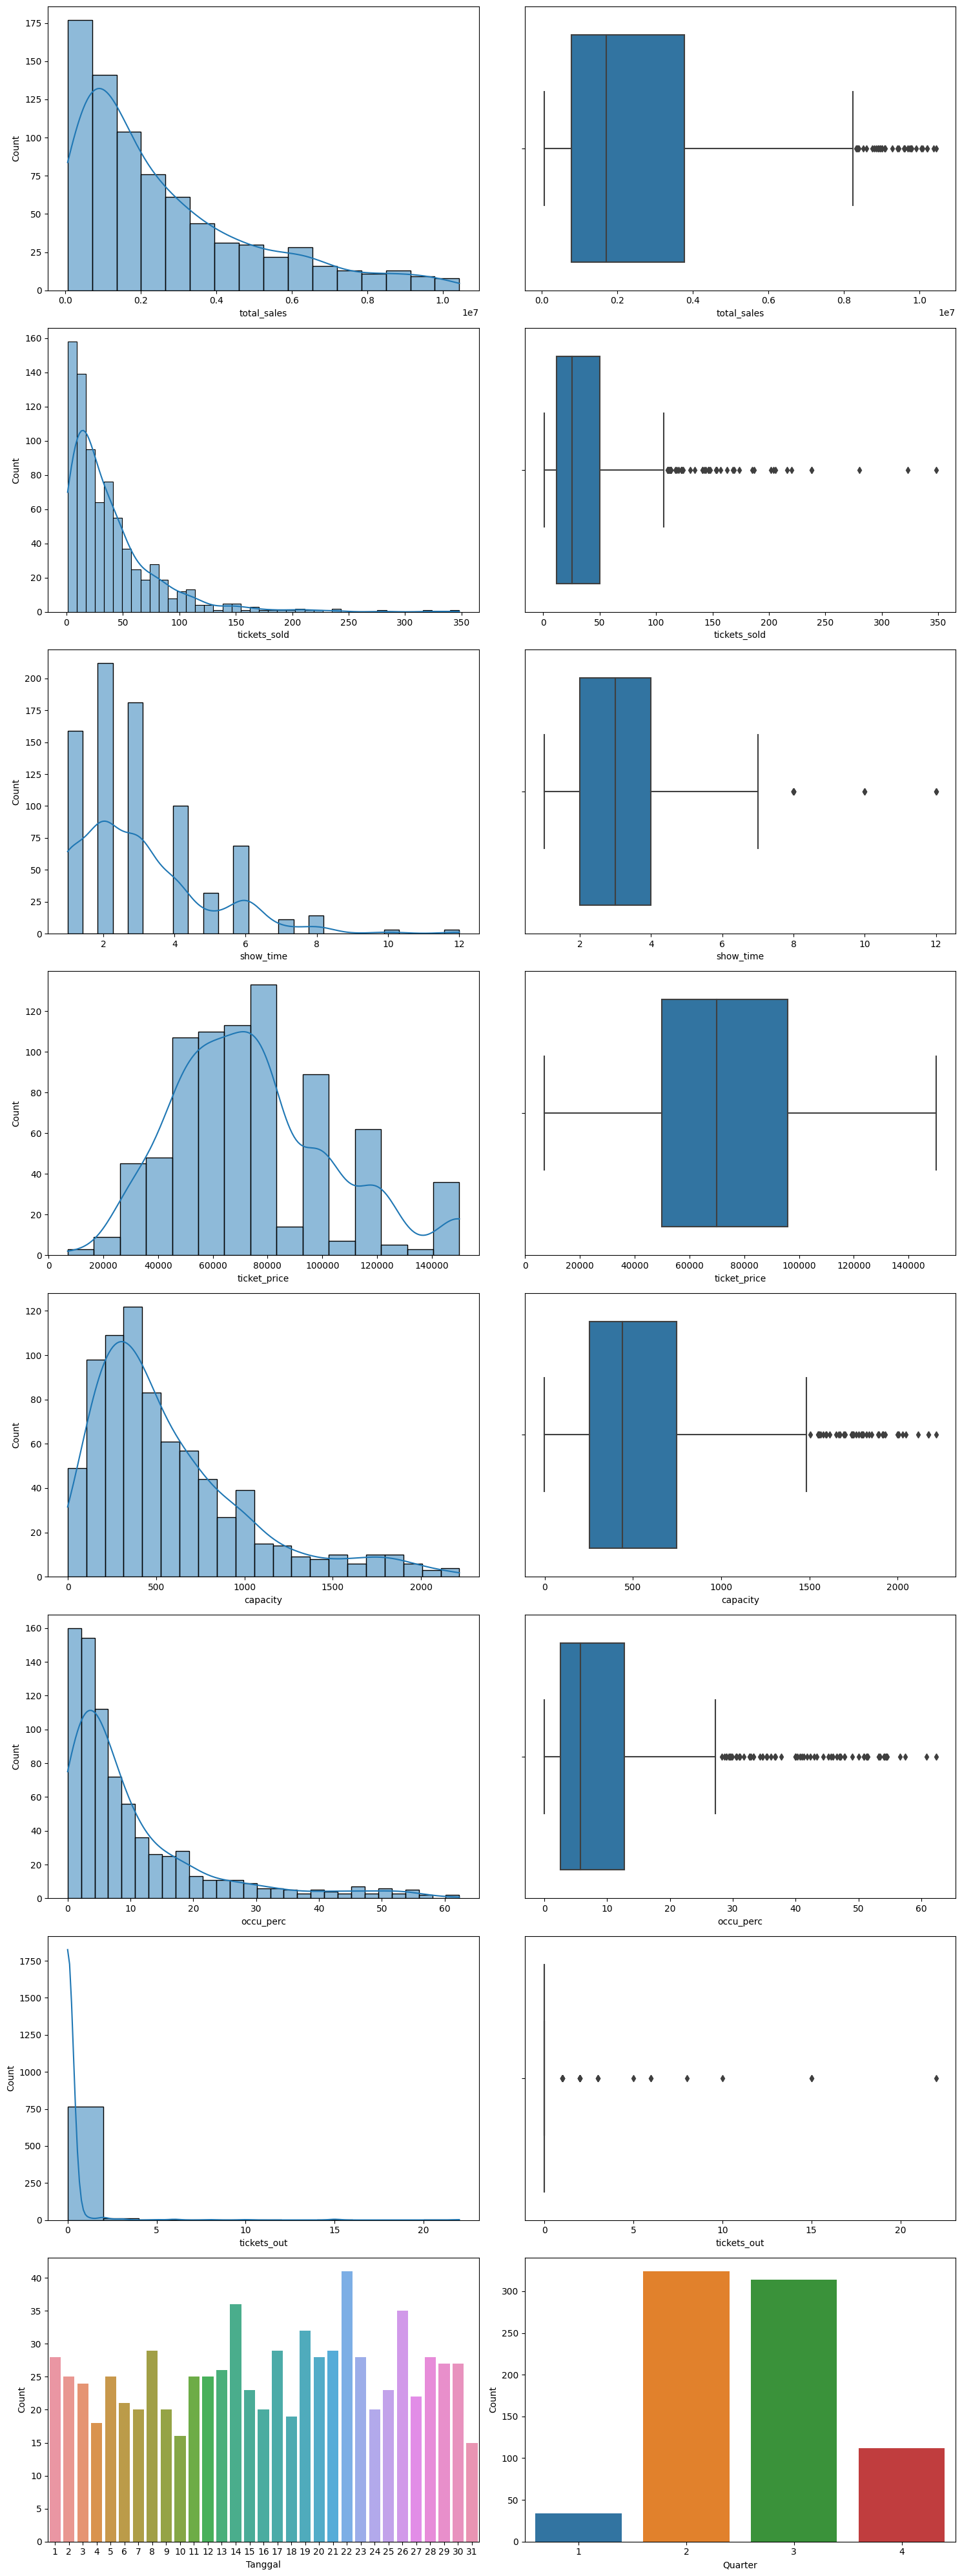

In [ ]:
plot_cluster(cluster1)

Ciri - ciri cluster 1 :

1. Tiket terjual pada satu bulan penuh dengan penjualan paling sering dilakukan antara bulan April sampai Juni
2. Rata - rata total penjualannya adalah 18 Juta Rupiah
3. Harga tiket rata - rata mencapai 93 Ribu Rupiah
4. Sebanyak 36155 tiket terjual
5. Di dominasi oleh bioskop dengan kapasitas 500 penonton
6. Persentase keterisian bioskop di mulai dari 10% sampai 60%
7. Jumlah tiket yang tidak digunakan relatif sedikit yaitu 14 tiket
8. Rata - rata film di putar pada jam tayang ke-empat


In [ ]:
cluster2.describe()

total_sales  tickets_sold  tickets_out   show_time   occu_perc  \
count  1.600000e+02    160.000000    160.00000  160.000000  160.000000   
mean   1.836509e+07    225.968750      0.08750    4.675000   32.980750   
std    6.240769e+06    121.014289      0.62834    2.227755   15.817405   
min    1.065000e+07     71.000000      0.00000    1.000000    4.510000   
25%    1.311250e+07    141.750000      0.00000    3.000000   19.545000   
50%    1.665000e+07    200.500000      0.00000    4.000000   32.420000   
75%    2.205750e+07    276.250000      0.00000    6.000000   45.632500   
max    3.348000e+07    712.000000      7.00000   16.000000   65.020000   

        ticket_price  ticket_use     capacity       month     quarter  \
count     160.000000  160.000000   160.000000  160.000000  160.000000   
mean    93510.764110  225.881250   819.246984    6.118750    2.462500   
std     34380.417193  121.044374   476.018224    2.260884    0.807882   
min     35000.000000   71.000000   207.980653    3.000000    1.000000   
25%     69300.756523  141.750000   441.766108    4.000000    2.000000   
50%     80000.000000  200.500000   638.020359    5.000000    2.000000   
75%    120000.000000  276.250000  1101.052161    8.000000    3.000000   
max    150000.000000  712.000000  2169.491525   11.000000    4.000000   

              day  cluster  
count  160.000000    160.0  
mean    15.887500      1.0  
std      9.487488      0.0  
min      1.000000      1.0  
25%      7.000000      1.0  
50%     16.500000      1.0  
75%     25.000000      1.0  
max     31.000000      1.0

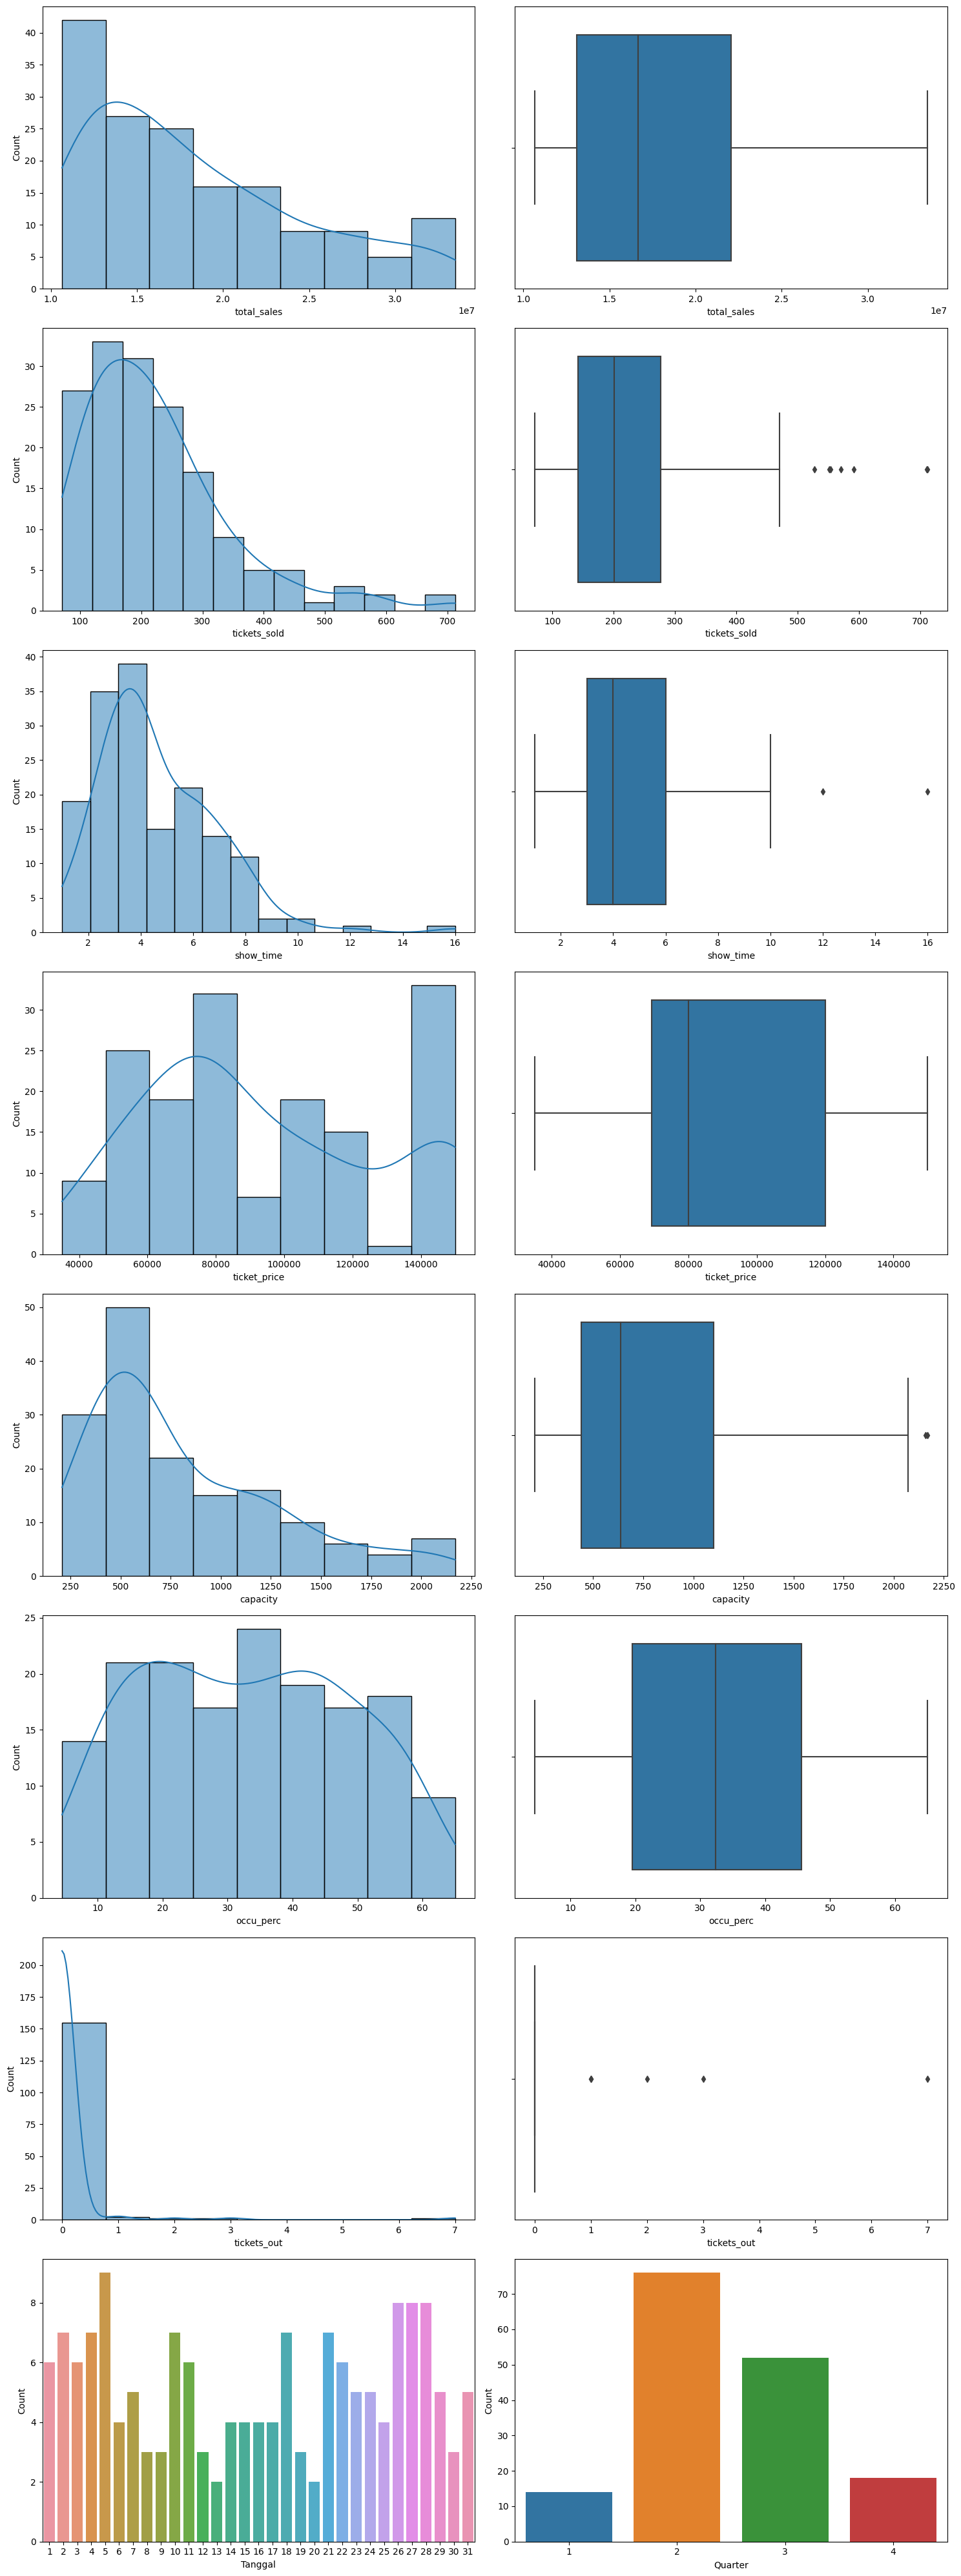

In [ ]:
plot_cluster(cluster2)

Ciri - ciri cluster 2 :

1. Tiket tidak dijual pada tanggal 7, 8, 12, 15, dan 16 dengan penjualan paling sedikit dilakukan antara bulan Januari sampai Maret
2. Rata - rata total penjualannya mencapai 50 Juta Rupiah
3. Tiket dijual dengan harga mulai dari 40 ribu sampai 150 ribu rupiah
4. Sebanyak 22732 tiket terjual
5. Di dominasi oleh bioskop dengan kapasitas 1000 penonton
6. Bioskop kebanyakan terisi kurang lebih sekitar 50% dari kapasitas yang disediakan
7. Jumlah tiket yang tidak digunakan relatif banyak hingga mencapai 47 tiket
8. Film rata - rata diputar pada jam tayang ke-enam

In [ ]:
cluster3.describe()

total_sales  tickets_sold  tickets_out  show_time  occu_perc  \
count  4.500000e+01     45.000000    45.000000  45.000000  45.000000   
mean   5.028689e+07    505.155556     1.044444   6.200000  44.342000   
std    1.345143e+07    213.599663     3.281876   4.082112  11.595323   
min    3.468000e+07    242.000000     0.000000   3.000000  18.660000   
25%    3.948000e+07    360.000000     0.000000   4.000000  36.290000   
50%    4.555000e+07    445.000000     0.000000   5.000000  45.920000   
75%    6.045000e+07    631.000000     0.000000   7.000000  53.980000   
max    8.101000e+07   1012.000000    18.000000  26.000000  64.680000   

        ticket_price   ticket_use     capacity      month    quarter  \
count      45.000000    45.000000    45.000000  45.000000  45.000000   
mean   110111.502864   504.111111  1176.323622   6.866667   2.777778   
std     33281.508986   213.017309   447.043732   2.398863   0.876172   
min     40000.000000   242.000000   408.025628   3.000000   1.000000   
25%     80118.858954   360.000000   784.061697   5.000000   2.000000   
50%    105807.291667   441.000000  1110.147441   7.000000   3.000000   
75%    147901.639344   631.000000  1561.861521   8.000000   3.000000   
max    150000.000000  1012.000000  2232.021710  11.000000   4.000000   

             day  cluster  
count  45.000000     45.0  
mean   16.200000      2.0  
std     9.790069      0.0  
min     1.000000      2.0  
25%     6.000000      2.0  
50%    18.000000      2.0  
75%    25.000000      2.0  
max    31.000000      2.0

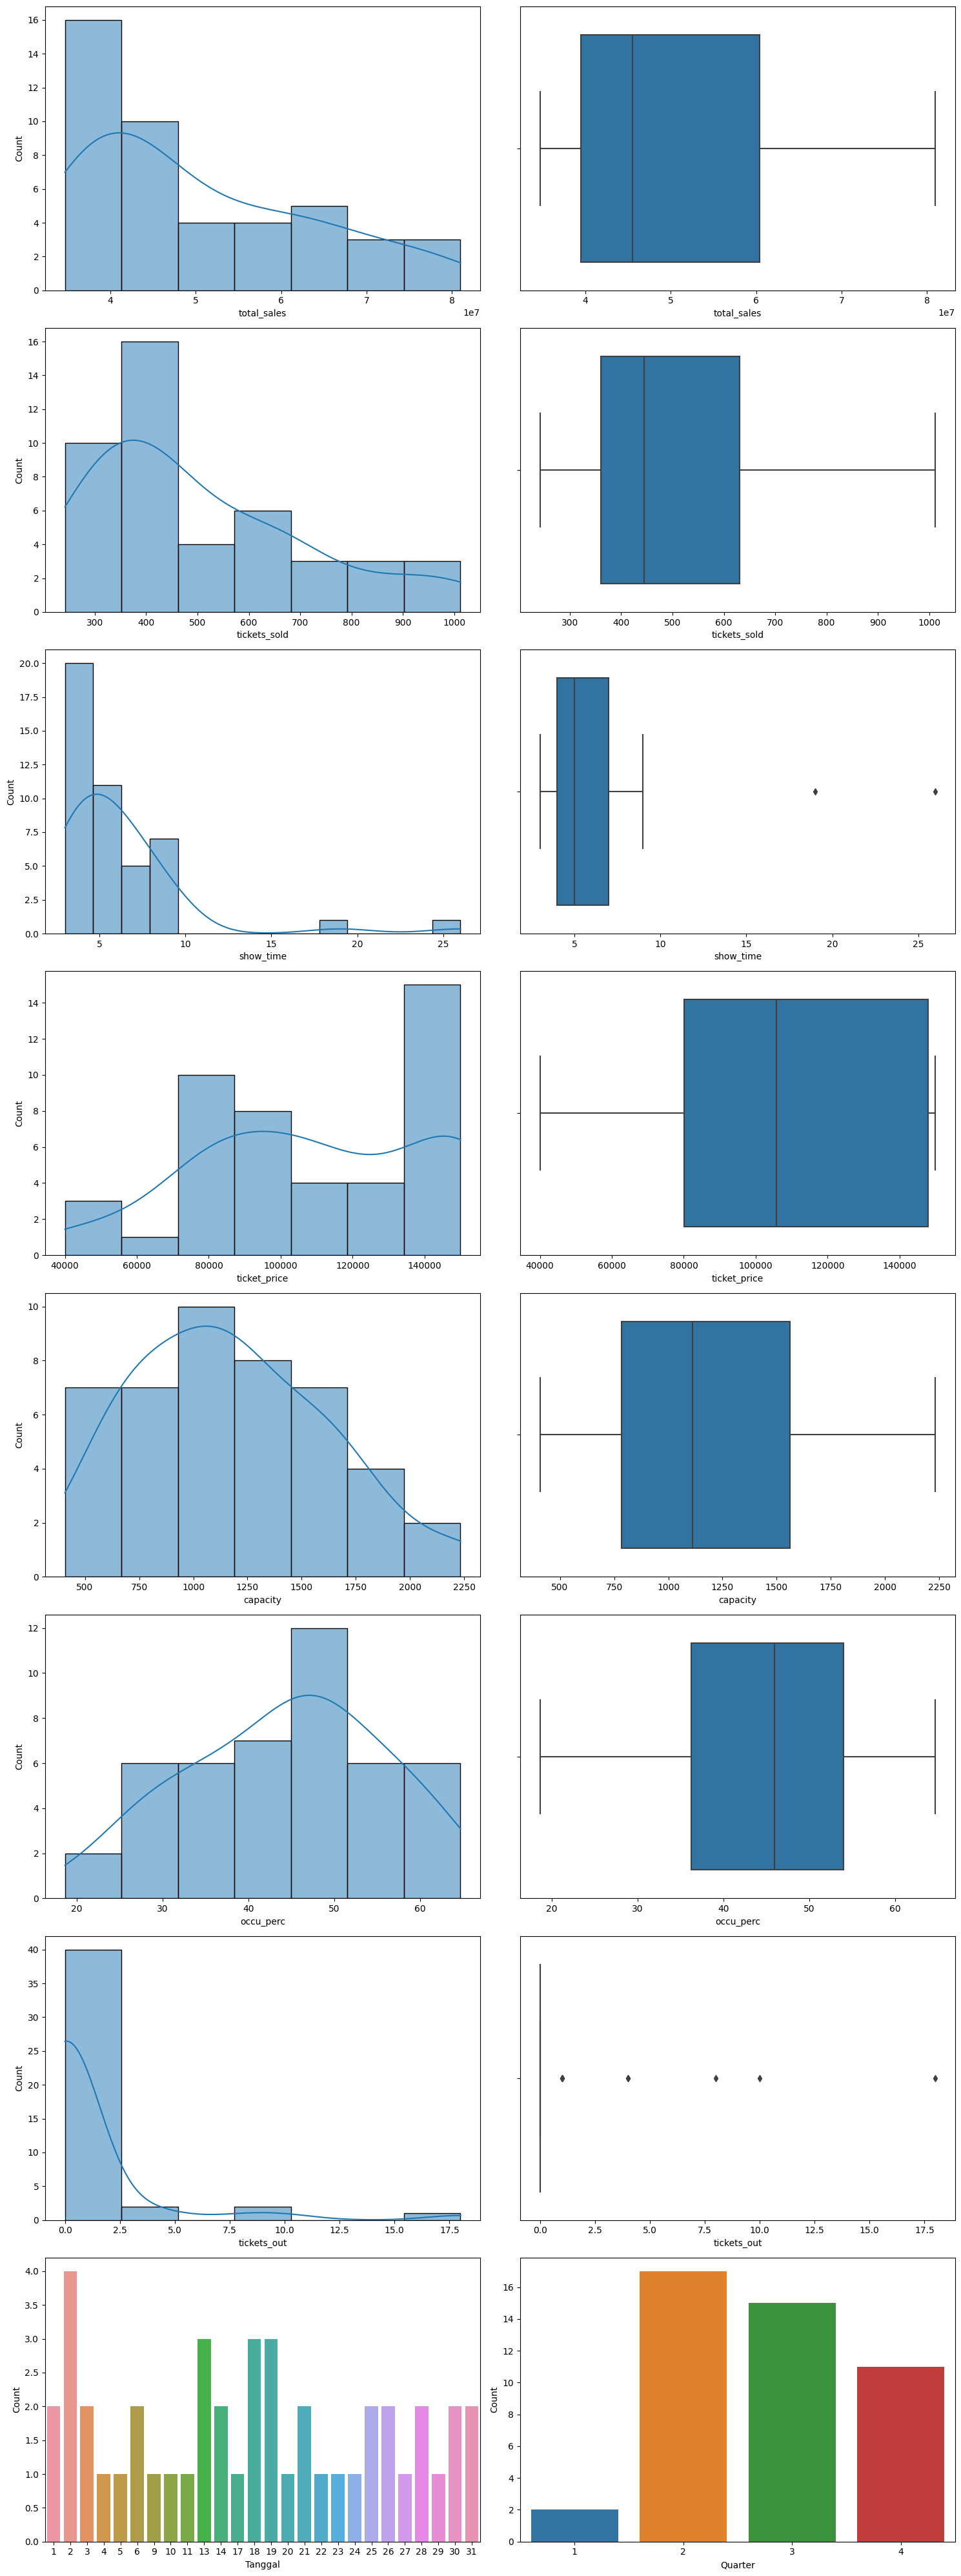

In [ ]:
plot_cluster(cluster3)

Ciri - ciri cluster 3 :

1. Tiket hanya terjual selama 8 hari dengan penjualan didominasi pada bulan April - Juni
2. Rata - rata total penjualannya mencapai 120 Juta Rupiah
3. Tiket dijual dengan harga mulai dari 116 ribu sampai 150 ribu rupiah
4. Terjual sebanyak 9205 tiket
5. Di dominasi oleh bioskop dengan kapasitas 1600 penonton
6. Bioskop kebanyakan terisi kurang lebih sekitar 57% dari kapasitas yang disediakan
7. Jumlah tiket yang tidak digunakan sangat sedikit yaitu 5 tiket
8. Kebanyakan film ditayangkan pada jam tayang ke-delapan

In [ ]:
cluster4.describe()

total_sales  tickets_sold  tickets_out  show_time  occu_perc  \
count  1.100000e+01     11.000000    11.000000  11.000000  11.000000   
mean   1.214355e+08    836.818182     0.454545   8.727273  55.652727   
std    1.581371e+07    108.547518     0.934199   6.574054   5.599027   
min    1.033500e+08    698.000000     0.000000   5.000000  46.920000   
25%    1.075250e+08    726.000000     0.000000   6.000000  53.350000   
50%    1.245000e+08    842.000000     0.000000   7.000000  56.780000   
75%    1.323800e+08    919.500000     0.500000   7.000000  57.130000   
max    1.522500e+08   1015.000000     3.000000  28.000000  64.470000   

        ticket_price   ticket_use     capacity      month    quarter  \
count      11.000000    11.000000    11.000000  11.000000  11.000000   
mean   145493.238662   836.363636  1523.965978   6.818182   2.727273   
std      9857.843373   108.681436   285.625020   2.891995   1.009050   
min    116215.053763   695.000000  1097.996583   3.000000   1.000000   
25%    148053.141313   726.000000  1312.973452   4.000000   2.000000   
50%    148568.019093   842.000000  1585.919758   8.000000   3.000000   
75%    149241.795463   919.500000  1705.771257   9.000000   3.500000   
max    150000.000000  1014.000000  1982.097187  11.000000   4.000000   

            day  cluster  
count  11.00000     11.0  
mean   13.00000      3.0  
std     9.13236      0.0  
min     1.00000      3.0  
25%     4.00000      3.0  
50%    14.00000      3.0  
75%    21.00000      3.0  
max    26.00000      3.0

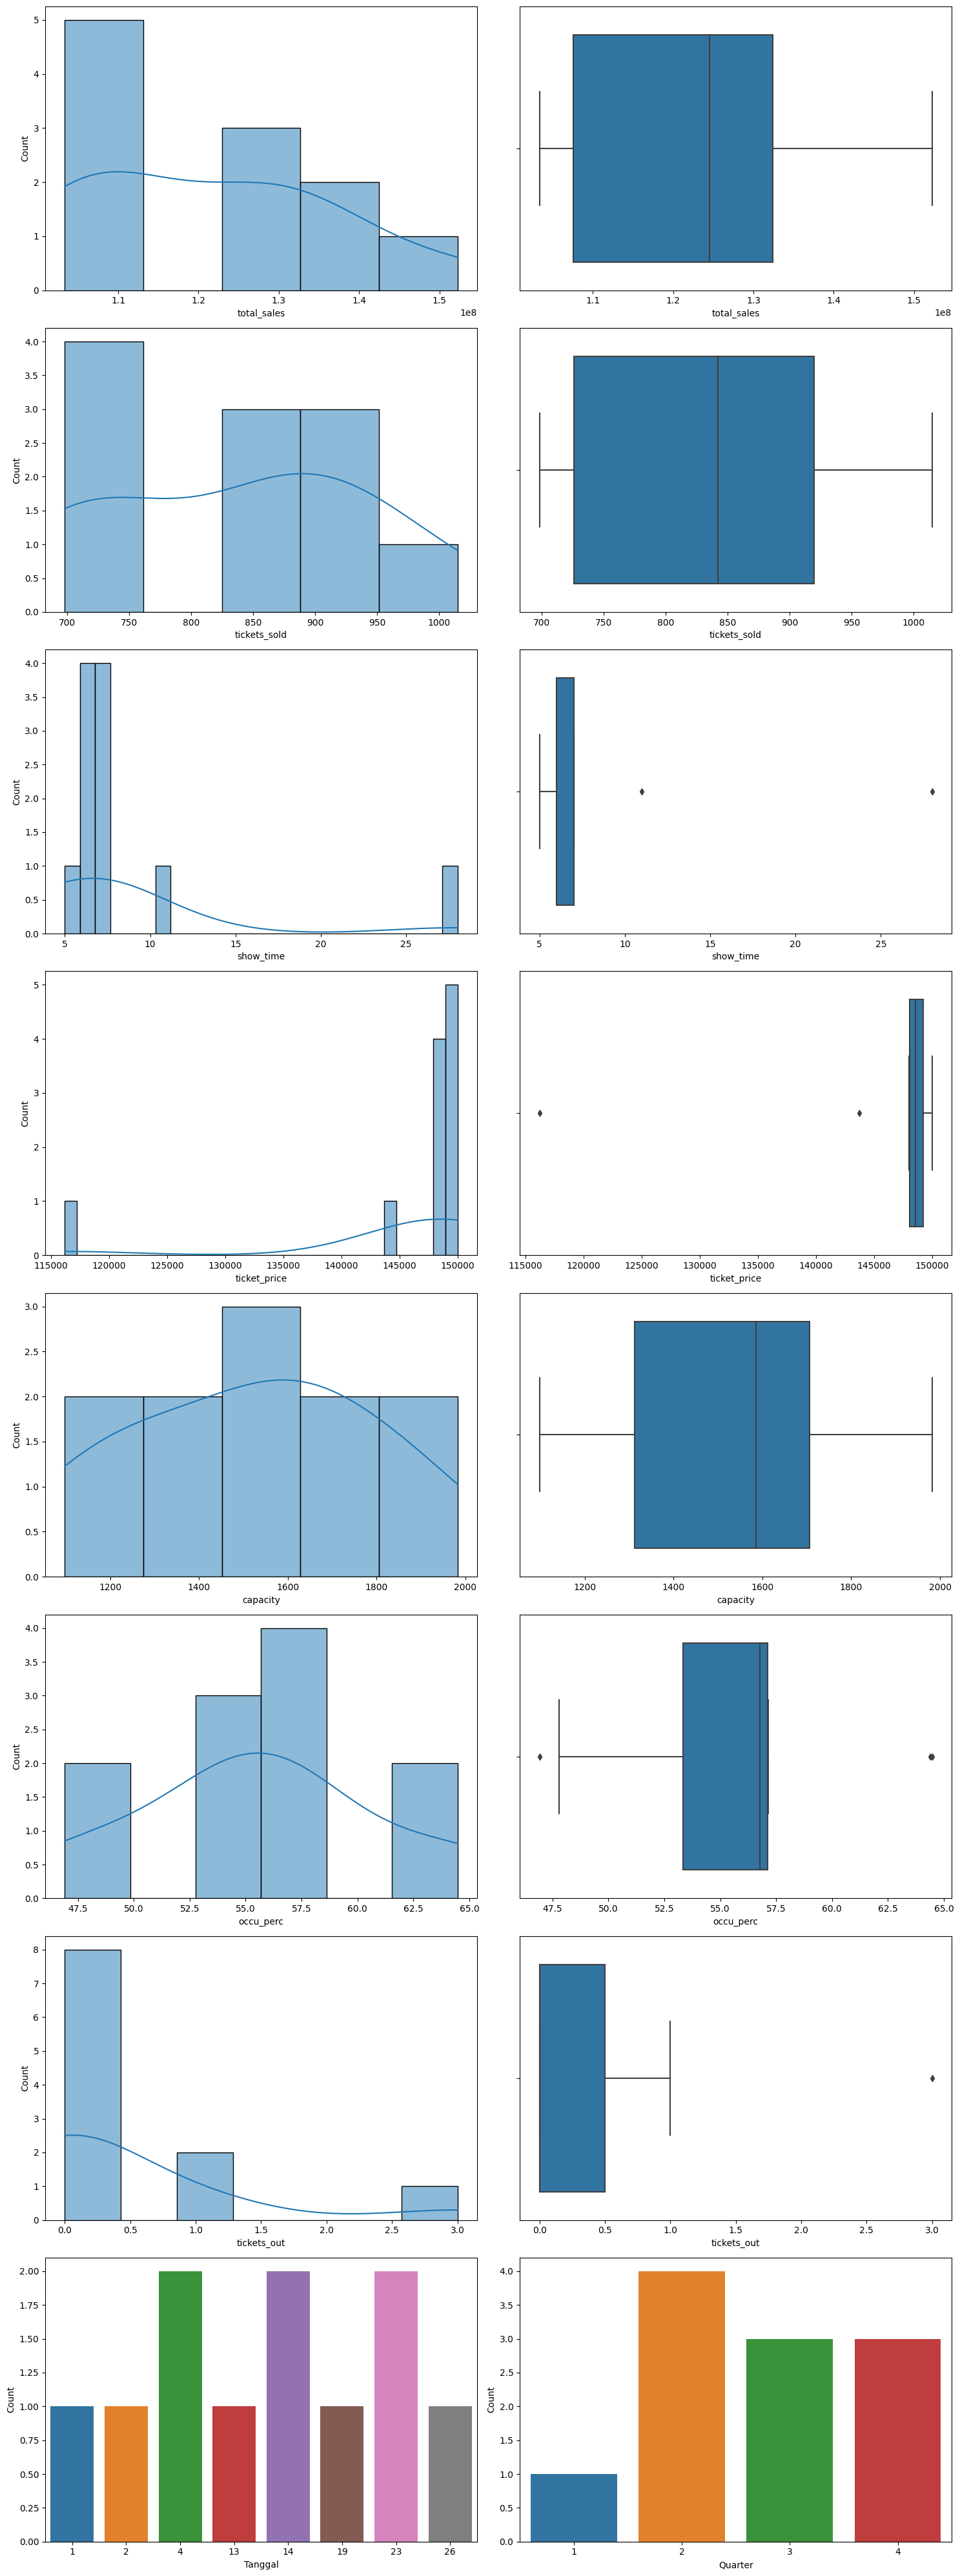

In [ ]:
plot_cluster(cluster4)

In [ ]:
cluster4['tickets_out'].sum()

5

Ciri - ciri cluster 4 :

1. Tiket hanya terjual selama 1 bulan penuh dengan penjualan didominasi pada bulan April - September
2. Rata - rata total penjualannya mencapai 2 Juta Rupiah
3. Tiket dijual dengan harga mulai dari 7 ribu sampai 150 ribu rupiah dengan rata - rata harga yaitu kebanyakan pada harga 80 ribu rupiah
4. Sebanyak 30255 tiket telah terjual
5. Rata - rata kapasitas bioskop menampung sebanyak 400 penonton
6. Bioskop jarang terisi karena persentase keterisiannya didominasi persentase di bawah 10%
7. Jumlah tiket yang tidak digunakan sangat banyak yaitu 117 tiket
8. Rata - rata jam tayangnya adalah jam tayang ketiga

######3D Plotting
Untuk melihat persebaran data tiap-tiap kluster, akan ditampilkan diagram persebaran dari variabel yang telah ditentukan, yaitu **total_sales**, **capacity**, dan **ticket_price**.

In [ ]:
px.scatter_3d(all_df, x='total_sales', y='ticket_price', z='capacity', color='cluster',color_continuous_scale=['#ADFF2F', '#19A3E8', '#FF5A44', '#FFD326'])

Di atas merupakan hasil persebaran data yang telah diclustering, dan terlihat bahwa perbedaan antara tiap kluster sangat jelas. Dimulai dari kluster 1 yang berwarna merah, kluster 2 yang berwarna hijau, kluster 3 yang berwarna ungu, dan kluster 4 yang berwarna ungu kebiruan. Selain itu, terdapat juga centroids atau titik-titik pusat tiap kluster yang ditandai dengan warna oranye.

In [ ]:
# px.scatter_3d(all_df, x='tickets_sold', y='ticket_use', z='capacity', color='cluster',color_continuous_scale=['#ADFF2F', '#19A3E8', '#FF5A44', '#FFD326'])

In [ ]:
# px.scatter_3d(all_df, x='tickets_out', y='occu_perc', z='ticket_price', color='cluster',color_continuous_scale=['#ADFF2F', '#19A3E8', '#FF5A44', '#FFD326'])

##Evaluation
Matriks evaluasi yang digunakan dalam penelitian ini adalah Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score. Silhouette score mengukur seberapa dekat setiap titik pada kluster tertentu dibandingkan dengan kluster lainnya. Semakin tinggi nilai silhouette score, semakin baik klaster tersebut. Calinski-Harabasz score mengukur rasio antara variansi yang dijelaskan oleh kluster dan variansi di antara kluster. Semakin tinggi nilai calinski-harabasz score, semakin baik algoritma clustering tersebut. Sedangkan Davies-Bouldin score mengukur jarak antara kluster dan meminimalkan jarak antar kluster, semakin rendah nilai Davies-Bouldin score, semakin baik algoritma clustering tersebut.

Kriteria untuk menilai algoritma clustering semakin baik atau tidak pada setiap matriks evaluasi adalah:

* Silhouette score: semakin dekat nilai silhouette score ke 1, semakin baik kualitas clustering. Nilai silhouette score yang dekat ke -1 menunjukkan cluster yang buruk.
* Calinski-Harabasz score: semakin tinggi nilai calinski-harabasz score, semakin baik kualitas clustering. Nilai yang rendah menunjukkan cluster yang tidak terpisah dengan baik.
* Davies-Bouldin score: semakin rendah nilai davies-bouldin score, semakin baik kualitas clustering. Nilai yang tinggi menunjukkan cluster yang saling tumpang tindih.

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Calinski-Harabasz Index
ch_score= calinski_harabasz_score(train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Davies-Bouldin Index
db_score= davies_bouldin_score(train.drop('cluster', axis=1), kmeans.clusters)

# Create dataframe for metrics and scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores = [silhouette_avg, ch_score, db_score]
df_scores = pd.DataFrame({'Metric': metrics, 'Score': scores})

# reset index dataframe
df_scores = df_scores.reset_index(drop=True)

# ubah nama axis pada index dan kolom
df_scores = df_scores.rename_axis('', axis=0).rename_axis('Metrics', axis=1)

# Display dataframe as table without index column
display(df_scores.style.hide_index())


##Deployment
Membuat kesimpulan analisis dan menyimpan data hasil klustering ke dalam sebuah file dengan format csv untuk digunakan dalam Looker Studio (Google Data Studio)

####Summary
Data pada dataset Cinema Ticket telah dianalisis dengan menggunakan algoritma klustering K-Means, yang membagi data ke dalam empat kluster berdasarkan ciri-cirinya masing-masing. Algoritma ini menunjukkan performa yang baik dengan nilai matriks Silhouette sebesar 0,7, matriks Calinski-Harabasz sebesar 4095, dan matriks Davies-Bouldin sebesar 0,45. Dari hasil klustering, ditemukan ciri-ciri menonjol pada setiap kluster sebagai berikut:

* Kluster 1: Menjual tiket paling banyak, yaitu mencapai 36 ribu tiket dengan kapasitas bioskop rata-rata sebesar 500 penonton. Jam tayang film pada kluster ini rata - rata berada pada jam tayang keempat, dan harga tiketnya standar, dengan rata-rata sebesar 93 ribu rupiah.

* Kluster 2: Selalu terisi sekitar 50% dari kapasitas yang disediakan, mulai dari 400 hingga lebih dari 2000 penonton. Harga tiket pada kluster ini relatif standar, dengan rata-rata sebesar 113 ribu rupiah, sehingga total penjualan mencapai 50 juta rupiah. Sering ditayangkan pada jam tayang keenam.

* Kluster 3: Memiliki total penjualan terbanyak, yaitu mencapai 120 juta rupiah, meskipun penjualan tiket hanya dilakukan pada tanggal tertentu dengan harga tiket yang cukup mahal, mulai dari 116 ribu hingga 150 ribu rupiah. Tiket yang tidak terpakai pada kluster ini sangat sedikit karena film kebanyakan diputar pada jam tayang kedelapan, dengan kapasitas bioskop kurang lebih sebanyak 1600 penonton.

* Kluster 4: Sering dijual mulai dari bulan April hingga September dengan harga tiket mulai dari 7 ribu hingga 150 ribu rupiah. Keuntungan yang didapat hanya sebesar 2 juta rupiah, paling sedikit di antara kluster lain. Tiket yang tidak digunakan sangat banyak dikarenakan jam tayang yang terlalu dini, yaitu kebanyakan jam tayang ketiga. Kebanyakan bioskop hanya terisi sebanyak 10% dari total kapasitas yang disediakan, yaitu kurang lebih 400 penonton.

####Save Data
Dataset yang telah diproses pada tahap **Modelling** akan disimpan, karena dataset pada proses itu terdapat tambahan kolom kluster yang memudahkan untuk dipresentasi dan divisualisasikan pada tahap lanjutan di luar dari analisis ini. Dataset disimpan dengan mengecualikan nilai index, agar proses penggunaannya lebih optimal

In [ ]:
train.to_csv('Cinema Ticket - Deployment.csv',index=False)